In [1]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#load the data
churn = pd.read_csv('churn.csv')

In [3]:
churn.shape

(10000, 14)

In [4]:
#explore head and tail of the full dataset
churn

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [5]:
#describe numeric features
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#metadata info about data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#check for null
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#check for duplicates
churn.duplicated().any()

False

# Data Pre-processing 1

In [10]:
#drop features not suitable for use
churn = churn.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

# Exploratory Data Analysis

In [11]:
#check updated data features
churn.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
6          822    France    Male   50       7       0.00              2   
7          376   Germany  Female   29       4  115046.74              4   
8          501    France    Male   44       4  142051.07              2   
9          684    France    Male   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [12]:
# unique values of categorical columns
categorical_cols = churn.select_dtypes(include='object').columns
for col in categorical_cols:
    print(col.upper())
    print(churn[col].value_counts())
    print('****************************************************** \n')

GEOGRAPHY
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
****************************************************** 

GENDER
Male      5457
Female    4543
Name: Gender, dtype: int64
****************************************************** 



In [13]:
#count unique values of target variable
churn.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

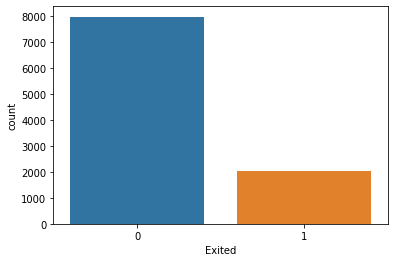

In [14]:
#plot to show distribution of target variable
sns.countplot(x='Exited', data=churn)

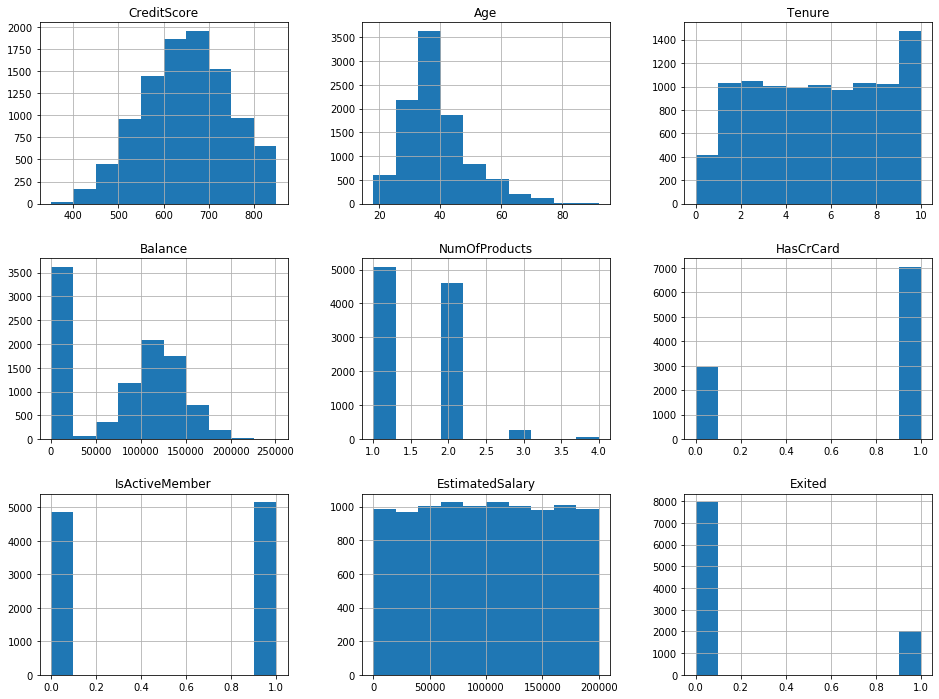

In [15]:
churn.hist(figsize=(16,12));

<Figure size 864x720 with 0 Axes>

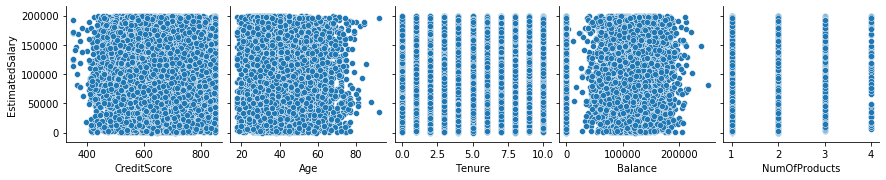

In [16]:
#pair plots against EstimatedSalary
plt.figure(figsize=(12,10))
sns.pairplot(data=churn, y_vars=['EstimatedSalary'], x_vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts'])

In [17]:
#check for correlation
corr_churn = churn.corr()
corr_churn

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

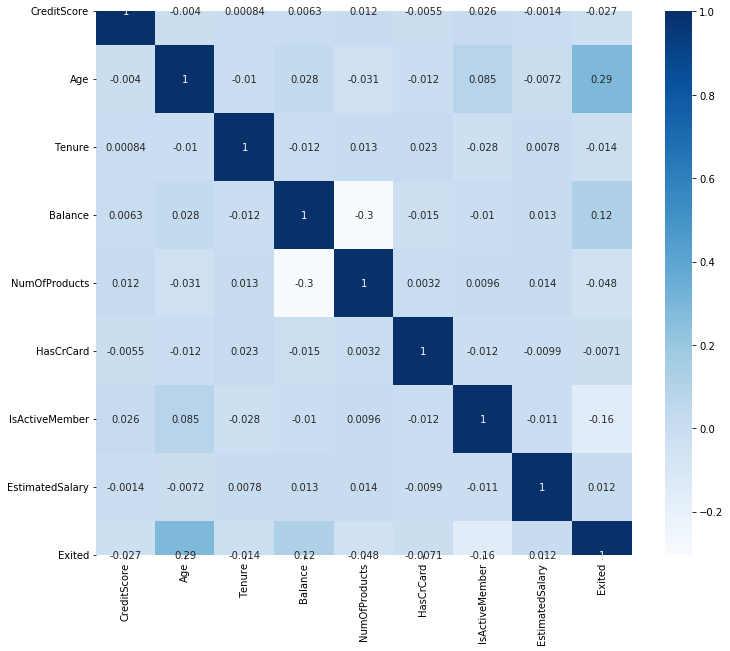

In [18]:
# correlation heat map
plt.figure(figsize=(12,10))
sns.heatmap(corr_churn, annot=True, cmap=plt.cm.Blues)
plt.show()

# Data Pre-processing 2

In [19]:
#assigning predictors
x_churn = churn.iloc[:,:-1]
x_churn.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [20]:
#assigning target variable
y_churn = churn.iloc[:,-1:]
y_churn.head()

Exited
0       1
1       0
2       1
3       0
4       0

# Encoding

In [21]:
#encoding categorical features
le_churn = LabelEncoder()
ohe_churn = OneHotEncoder()
x_churn['Gender'] = le_churn.fit_transform(x_churn['Gender']) 
geo_ohe = pd.DataFrame(ohe_churn.fit_transform(x_churn[['Geography']]).toarray())

C:\Users\FINTRAK\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\FINTRAK\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

In [22]:
geo_ohe.columns = ohe_churn.get_feature_names(['Geography'])
geo_ohe.head()

Geography_France  Geography_Germany  Geography_Spain
0               1.0                0.0              0.0
1               0.0                0.0              1.0
2               1.0                0.0              0.0
3               1.0                0.0              0.0
4               0.0                0.0              1.0

In [23]:
#merge Geography feature as encoded columns
x_churn = x_churn.join(geo_ohe)

In [24]:
#drop geography feature
x_churn.drop(columns=['Geography'], inplace=True)
x_churn.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        101348.88               1.0                0.0   
1               1        112542.58               0.0                0.0   
2               0        113931.57               1.0                0.0   
3               0         93826.63               1.0                0.0   
4               1         79084.10               0.0                0.0   

   Geography_Spain  
0              0.0  
1              1.0  
2              0.0  
3              0.0  
4              1.0

# Split Data

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_churn,y_churn,test_size=0.2,random_state=42)

In [52]:
data_dict = {'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test}
for i in data_dict:
    print('The shape of {} is {}'.format(i, data_dict[i].shape))

The shape of x_train is (8000, 12)
The shape of x_test is (2000, 12)
The shape of y_train is (8000, 1)
The shape of y_test is (2000, 1)


# Scaling or Normalization

In [53]:
#scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#normalization
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

In [54]:
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [55]:
#saving y_train as nparray
y_train = y_train.values

# Model - Deep learning

In [57]:
#initialize classifier model with input, hidden and output layers
classifier = Sequential()
classifier.add(Dense(units=16, activation='relu', input_dim=12,))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [58]:
#compile the classifier with stochastic gradient descent
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [61]:
#fit the classifier model
classifier.fit(x_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3416 - accuracy: 0.8586
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3399 - accuracy: 0.8606
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3388 - accuracy: 0.8587
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.3382 - accuracy: 0.8602
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3366 - accuracy: 0.8606
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3365 - accuracy: 0.8602
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3343 - accuracy: 0.8629
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3353 - accuracy: 0.8610
Epoch 9/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3342 - accuracy: 0.8626
Epoch 10/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3335 - accuracy: 0.8635

In [91]:
#predict on test data
y_pred = classifier.predict(x_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.10875418],
       [0.01174937],
       [0.09166973],
       ...,
       [0.6899239 ],
       [0.04696104],
       [0.343422  ]], dtype=float32)

In [97]:
y_pred = y_pred > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [98]:
y_pred.dtype

dtype('bool')

In [99]:
#use predicted outcome to check customers likely to leave or not
likelyToLeave = 0
notLikelyToLeave = 0

for i in y_pred:
    if i[0] == True:
        likelyToLeave += 1
    else:
        notLikelyToLeave += 1
print('No of Customers likely to leave:{} '.format(likelyToLeave))
print('No of Customers not likely to leave:{} '.format(notLikelyToLeave))

No of Customers likely to leave:249 
No of Customers not likely to leave:1751 


In [102]:
#confusion metrics
cm = confusion_matrix(y_test.values, y_pred)
print(cm)

[[1538   69]
 [ 213  180]]


In [103]:
#classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

